In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("insurance.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:


sns.set(style='whitegrid', palette='muted',color_codes=True)

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


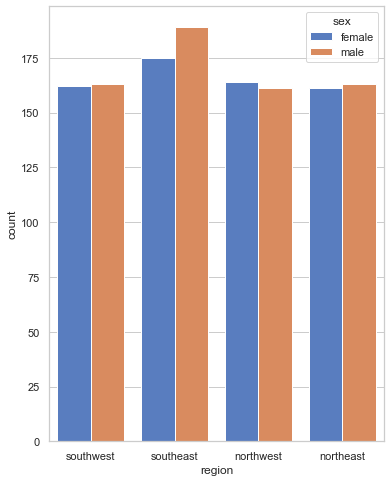

In [9]:
figure,ax = plt.subplots(figsize=(6,8))

sns.countplot(dataset.region, hue=dataset.sex)

plt.show()

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


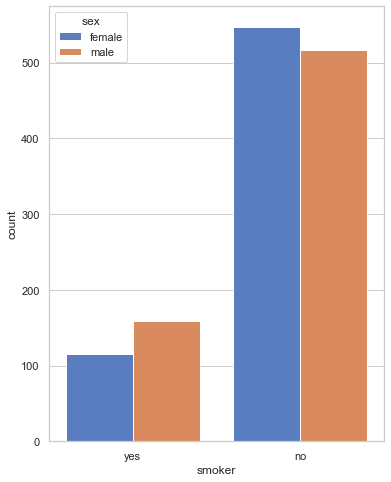

In [10]:
figure,ax = plt.subplots(figsize=(6,8))

sns.countplot(dataset.smoker, hue=dataset.sex)

plt.show()

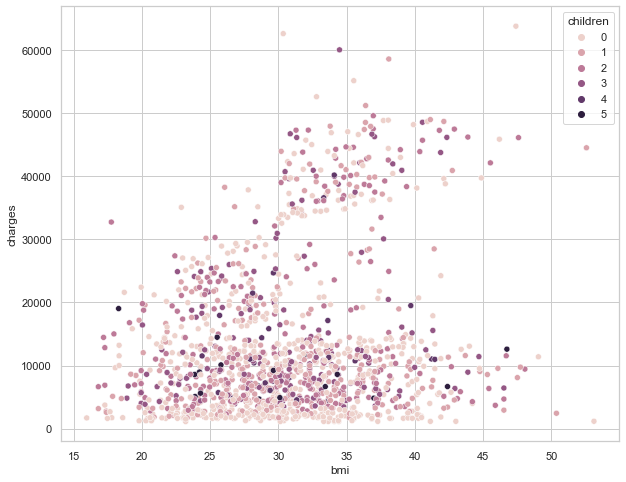

In [11]:
figure,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=dataset.bmi,y=dataset.charges,data=dataset,hue=dataset.children)
plt.show()

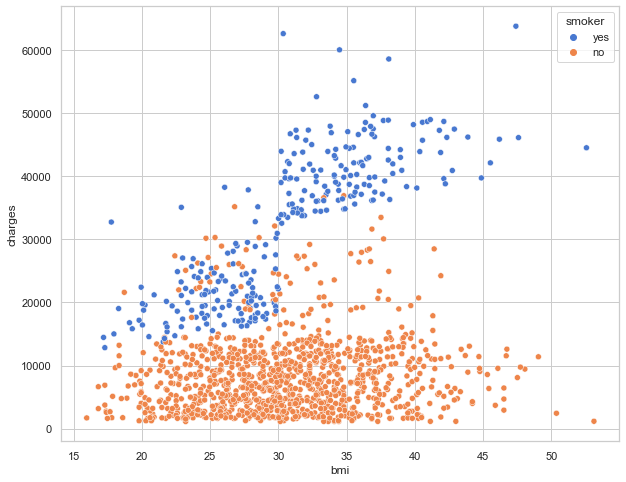

In [12]:
figure,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=dataset.bmi,y=dataset.charges,data=dataset,hue=dataset.smoker)
plt.show()

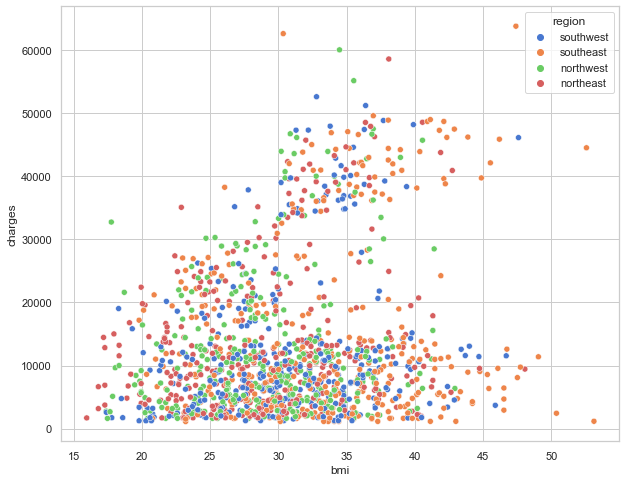

In [13]:
figure,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=dataset.bmi,y=dataset.charges,data=dataset,hue=dataset.region)
plt.show()

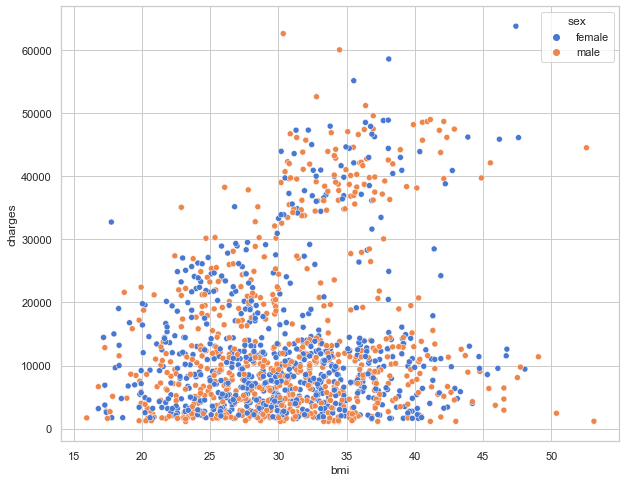

In [14]:
figure,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=dataset.bmi,y=dataset.charges,data=dataset,hue=dataset.sex)
plt.show()

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

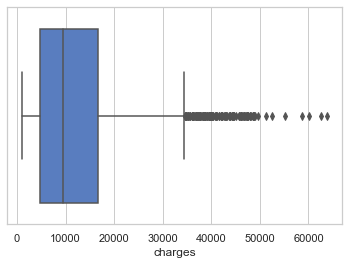

In [15]:
sns.boxplot(dataset.charges)

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

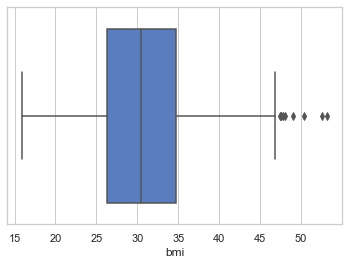

In [16]:
sns.boxplot(dataset.bmi)

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

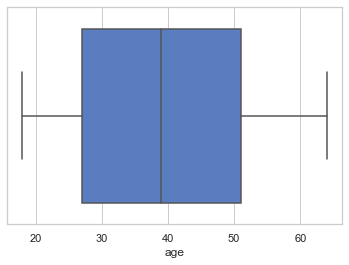

In [17]:
sns.boxplot(dataset.age)

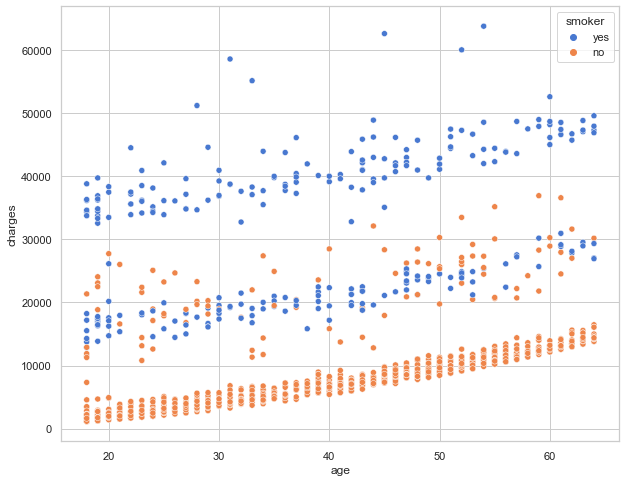

In [18]:
figure,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=dataset.age,y=dataset.charges,data=dataset,hue=dataset.smoker)
plt.show()

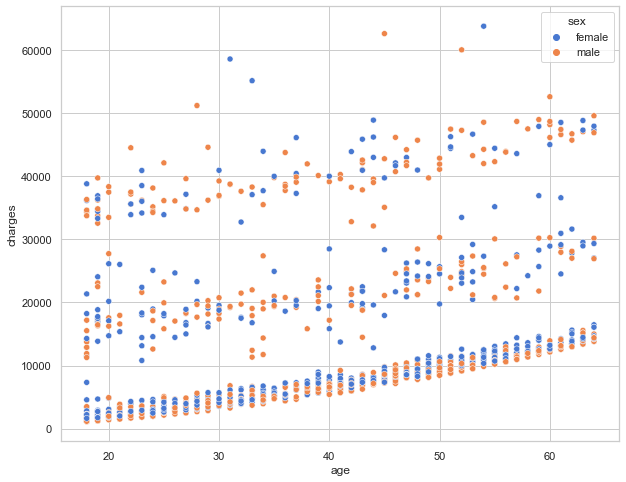

In [19]:
figure,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=dataset.age,y=dataset.charges,data=dataset,hue=dataset.sex)
plt.show()

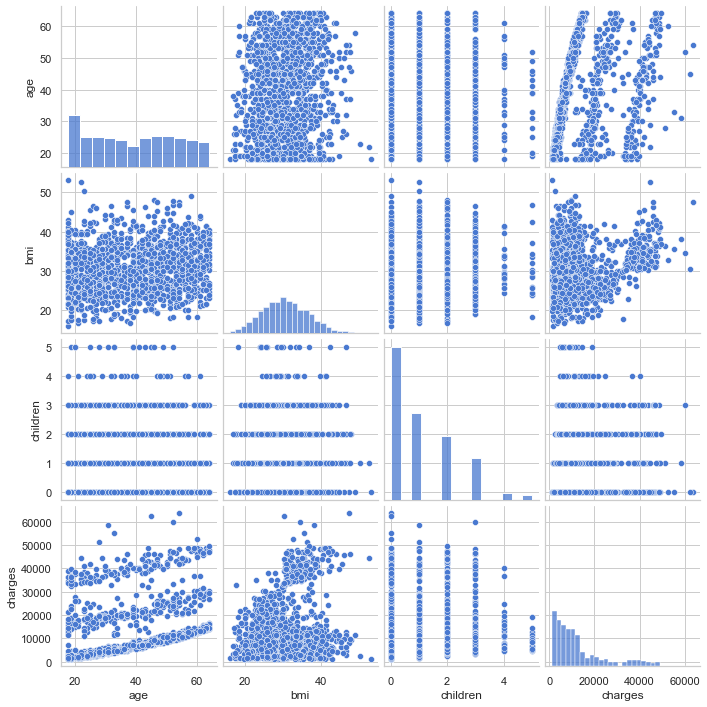

In [20]:
sns.pairplot(dataset)

In [21]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
categorical = ['sex','smoker','region']
final_data = pd.get_dummies(dataset, columns=categorical)

In [25]:
# Plotting Correlation Heatmap
import plotly.figure_factory as ff

corrs = final_data.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

In [32]:
X = final_data.drop(['charges'], axis = 1) # Features
Y = final_data['charges'] # Labels

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [110]:
# Implementing Random Forest Regression
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=1)
grid_param = {'n_estimators': [50,100,150,200,250]}

gd_sr = GridSearchCV(estimator=rfr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print("Optimal parameters:\n", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best mean cross-validated score:\n", best_result)

Optimal parameters:
 {'n_estimators': 150}
Best mean cross-validated score:
 0.8311457708132425


In [38]:
# Building random forest using the tuned parameter
rfr = RandomForestRegressor(n_estimators=150, criterion='mse', max_features='sqrt', random_state=1)
rfr.fit(X_scaled,Y)
featimp = pd.Series(rfr.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

smoker_yes          0.335554
smoker_no           0.289852
bmi                 0.174115
age                 0.147259
children            0.025569
region_southeast    0.005753
region_northeast    0.004976
sex_male            0.004455
region_northwest    0.004438
region_southwest    0.004153
sex_female          0.003876
dtype: float64


In [39]:
X_ = final_data[['smoker_yes', 'smoker_no', 'bmi', 'age', 'children']]

In [40]:
feature_scaler = StandardScaler()
X_scaled_ = feature_scaler.fit_transform(X_)

In [42]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_scaled_,Y,test_size=0.3,random_state=1)

In [43]:
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfr = RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=1)
grid_param = {'n_estimators': [50,100,150,200,250]}

gd_sr = GridSearchCV(estimator=rfr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_train1, Y_train1)

best_parameters = gd_sr.best_params_
print("Optimal parameters:\n", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best mean cross-validated score:\n", best_result)

Optimal parameters:
 {'n_estimators': 150}
Best mean cross-validated score:
 0.8296368617559235


In [44]:
#Implementing Linear Regression
# Tuning the SGDRegressor parameters 'eta0' (learning rate) and 'max_iter' using Grid Search

from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(random_state = 1)
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}

gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)



{'eta0': 0.01, 'max_iter': 10000}
0.7453983363912984


In [51]:
# Implementing Support Vector Regression
# Tuning the SVR parameters 'kernel', 'C', 'epsilon' and implementing cross-validation using Grid Search

from sklearn.svm import SVR

svr = SVR()
grid_param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [10,100,1000,10000], 'epsilon': [100,1000,10000]}

gd_sr = GridSearchCV(estimator=svr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print("Optimal parameters:\n", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best mean cross-validated score:\n", best_result)

Optimal parameters:
 {'C': 10000, 'epsilon': 1000, 'kernel': 'rbf'}
Best mean cross-validated score:
 0.8278424069855612


In [111]:
#Decision tree

from sklearn import tree

dtr = tree.DecisionTreeRegressor(random_state=1)
grid_param = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

gd_sr = GridSearchCV(estimator=dtr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print("Optimal parameters:\n", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best mean cross-validated score:\n", best_result)

Optimal parameters:
 {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'splitter': 'best'}
Best mean cross-validated score:
 0.849004210459583


In [112]:
randomforest = RandomForestRegressor(n_estimators = 150, criterion='mse', max_features='sqrt', random_state=1)

randomforest.fit(X_train,Y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=150, random_state=1)

In [113]:
Y_predict= randomforest.predict(X_test)

In [114]:
randomforest.score(X_train,Y_train)

0.9773613280130029

In [115]:
randomforest.score(X_test,Y_test)

0.8357245211803372

In [116]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_predict))
print('MSE:', metrics.mean_squared_error(Y_test, Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

MAE: 2703.605341948374
MSE: 23280574.300416846
RMSE: 4824.994746154326


In [117]:
# RMSE/(max(DV)-min(DV))

4824.9947/(max(Y)-min(Y))

0.07701685647091146

In [118]:
metrics.r2_score(Y_test, Y_predict)

0.8357245211803372

In [119]:
decision = tree.DecisionTreeRegressor(max_depth= 5, max_features= 'auto', max_leaf_nodes= None, min_samples_leaf= 10, splitter= 'best', random_state=1)

decision.fit(X_train,Y_train)

Y_predict1= decision.predict(X_test)

decision.score(X_train,Y_train)

0.8784075862795221

In [120]:
decision.score(X_test,Y_test)

0.850756927384472

In [121]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_predict1))
print('MSE:', metrics.mean_squared_error(Y_test, Y_predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict1)))

MAE: 2563.209474382707
MSE: 21150231.70720739
RMSE: 4598.938106477123


In [122]:
# RMSE/(max(DV)-min(DV))

4598.9381/(max(Y)-min(Y))

0.07340852738476712

In [123]:
metrics.r2_score(Y_test, Y_predict1)

0.850756927384472

In [75]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [126]:
input_data = ([[32,28.880,0,0,1,1,0,0,1,0,0]])


input_data_numpy_array = np.asarray(input_data)

reshape_input_data = input_data_numpy_array.reshape(1,-1)

prediction = randomforest.predict(reshape_input_data)

output=round(prediction[0],2)

print(output)

4362.78


In [127]:
input_data = ([[32,28.880,0,0,1,1,0,0,1,0,0]])


input_data_numpy_array = np.asarray(input_data)

reshape_input_data = input_data_numpy_array.reshape(1,-1)

prediction = decision.predict(reshape_input_data)

output=round(prediction[0],2)

print(output)

5573.4


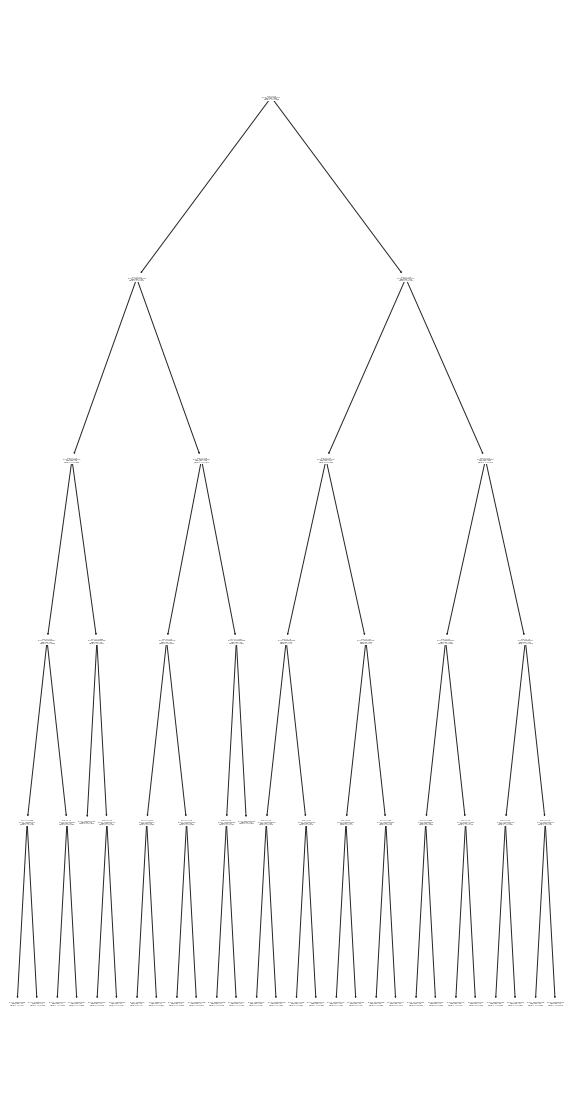

In [136]:
import matplotlib.pyplot as plt

figure = plt.subplots(figsize = (10,20))
tree.plot_tree(decision)
plt.show()

In [137]:
import pickle
# open a file, where you ant to store the data
file = open('Random_forest_regressor.pkl', 'wb')


# dump information to that file
pickle.dump(randomforest, file)